#### Import Required Libraries

In [2]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", 200)

#### Load datasets

In [3]:
orders = pd.read_csv('orders.csv')
supply_chain = pd.read_csv('supply_chain.csv')
support_tickets = pd.read_csv('support_tickets.csv')
communication_logs = pd.read_csv('communication_logs.csv')
vet_calls = pd.read_csv('vet_calls.csv')

print("All datasets loaded successfully.")

All datasets loaded successfully.


#### Initial Data Inspection

In [4]:
print("Orders:", orders.shape)
print("Supply Chain:", supply_chain.shape)
print("Support Tickets:", support_tickets.shape)
print("Communication Logs:", communication_logs.shape)
print("Vet Calls:", vet_calls.shape)

Orders: (10000, 16)
Supply Chain: (10000, 9)
Support Tickets: (5000, 8)
Communication Logs: (40000, 8)
Vet Calls: (5000, 7)


In [5]:
orders.head()

,order_id,customer_id,order_date,order_status,payment_mode,product_id,product_category,order_value,discount_value,promised_delivery_date,actual_delivery_date,city,state,is_repeat_customer,shipment_partner,shipment_mode
0,ST2025000000,8270,2024-02-10 02:13:00,Delivered,UPI,SKU03899,Accessories,2384.14,298.90,2024-02-15 02:13:00,2024-02-14 02:13:00,Kolkata,Tamil Nadu,True,Bluedart,Surface
1,ST2025000001,1860,2024-09-09 22:45:00,Shipped,COD,SKU03852,Food,2449.95,462.15,2024-09-13 22:45:00,2024-09-14 22:45:00,Delhi,Tamil Nadu,True,Bluedart,Surface
2,ST2025000002,6390,2024-02-06 19:52:00,Delivered,COD,SKU02734,Accessories,3183.37,255.23,2024-02-09 19:52:00,2024-02-09 19:52:00,Pune,Delhi,False,XpressBees,Air
3,ST2025000003,6191,2024-10-15 18:26:00,Shipped,Wallet,SKU03811,Accessories,3814.24,139.82,2024-10-17 18:26:00,2024-10-19 18:26:00,Delhi,West Bengal,True,Ecom,Air
4,ST2025000004,6734,2024-05-14 23:22:00,Delivered,Card,SKU02654,Grooming,1519.94,192.42,2024-05-16 23:22:00,2024-05-15 23:22:00,Chennai,West Bengal,True,Bluedart,Air


In [6]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   order_id                10000 non-null  object 
 1   customer_id             10000 non-null  int64  
 2   order_date              10000 non-null  object 
 3   order_status            10000 non-null  object 
 4   payment_mode            10000 non-null  object 
 5   product_id              10000 non-null  object 
 6   product_category        10000 non-null  object 
 7   order_value             10000 non-null  float64
 8   discount_value          10000 non-null  float64
 9   promised_delivery_date  10000 non-null  object 
 10  actual_delivery_date    10000 non-null  object 
 11  city                    10000 non-null  object 
 12  state                   10000 non-null  object 
 13  is_repeat_customer      10000 non-null  bool   
 14  shipment_partner        10000 non-null 

In [7]:
orders.nunique()

order_id                  10000
customer_id                6002
order_date                 9916
order_status                  5
payment_mode                  4
product_id                 4307
product_category              4
order_value                9860
discount_value             9058
promised_delivery_date     9900
actual_delivery_date       9885
city                          7
state                         6
is_repeat_customer            2
shipment_partner              4
shipment_mode                 2
dtype: int64

In [8]:
orders.describe(include="all")

,order_id,customer_id,order_date,order_status,payment_mode,product_id,product_category,order_value,discount_value,promised_delivery_date,actual_delivery_date,city,state,is_repeat_customer,shipment_partner,shipment_mode
count,10000,10000.000000,10000,10000,10000,10000,10000,10000.000000,10000.000000,10000,10000,10000,10000,10000,10000,10000
unique,10000,NaN,9916,5,4,4307,4,NaN,NaN,9900,9885,7,6,2,4,2
top,ST2025000000,NaN,2024-10-07 05:13:00,Delivered,UPI,SKU02079,Grooming,NaN,NaN,2024-08-23 17:59:00,2024-02-12 05:03:00,Mumbai,Tamil Nadu,False,Ecom,Air
freq,1,NaN,2,3980,2595,9,2577,NaN,NaN,2,3,1471,1713,6469,2527,5045
mean,NaN,5462.898000,NaN,NaN,NaN,NaN,NaN,2069.241024,250.678895,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,2589.212679,NaN,NaN,NaN,NaN,NaN,1113.651032,144.323034,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,1001.000000,NaN,NaN,NaN,NaN,NaN,150.060000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,3217.000000,NaN,NaN,NaN,NaN,NaN,1110.437500,126.377500,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,5477.000000,NaN,NaN,NaN,NaN,NaN,2058.745000,251.890000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,7698.000000,NaN,NaN,NaN,NaN,NaN,3047.722500,375.622500,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
supply_chain.head()

,order_id,warehouse,first_mile_scan,hub_in_scan,out_for_delivery,rto_flag,courier_delay_flag,weight,shipment_tat_hours
0,ST2025000000,HYD,2024-02-10 05:13:00,2024-02-10 23:13:00,2024-02-11 02:13:00,False,False,2.99,57
1,ST2025000001,GGN,2024-09-10 07:45:00,2024-09-10 17:45:00,2024-09-12 20:45:00,False,False,2.58,63
2,ST2025000002,BOM,2024-02-07 03:52:00,2024-02-07 14:52:00,2024-02-09 11:52:00,False,False,1.07,132
3,ST2025000003,BOM,2024-10-15 20:26:00,2024-10-17 00:26:00,2024-10-17 04:26:00,False,False,2.64,123
4,ST2025000004,BOM,2024-05-15 07:22:00,2024-05-16 07:22:00,2024-05-17 22:22:00,False,False,2.16,192


In [10]:
supply_chain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   order_id            10000 non-null  object 
 1   warehouse           10000 non-null  object 
 2   first_mile_scan     10000 non-null  object 
 3   hub_in_scan         10000 non-null  object 
 4   out_for_delivery    10000 non-null  object 
 5   rto_flag            10000 non-null  bool   
 6   courier_delay_flag  10000 non-null  bool   
 7   weight              10000 non-null  float64
 8   shipment_tat_hours  10000 non-null  int64  
dtypes: bool(2), float64(1), int64(1), object(5)
memory usage: 566.5+ KB


In [11]:
supply_chain.nunique()

order_id              10000
warehouse                 5
first_mile_scan        9891
hub_in_scan            9905
out_for_delivery       9896
rto_flag                  2
courier_delay_flag        2
weight                  281
shipment_tat_hours      176
dtype: int64

In [12]:
supply_chain.describe(include="all")

,order_id,warehouse,first_mile_scan,hub_in_scan,out_for_delivery,rto_flag,courier_delay_flag,weight,shipment_tat_hours
count,10000,10000,10000,10000,10000,10000,10000,10000.000000,10000.000000
unique,10000,5,9891,9905,9896,2,2,NaN,NaN
top,ST2025000000,GGN,2024-05-08 04:20:00,2024-05-25 04:37:00,2024-02-26 19:55:00,False,False,NaN,NaN
freq,1,2081,3,2,3,9263,9006,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.600988,111.572100
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.804702,50.924936
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.200000,24.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.900000,68.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.600000,111.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.290000,155.000000


In [13]:
support_tickets.head()

,ticket_id,customer_id,order_id,issue_category,created_at,resolved_at,resolution_status,csat_score
0,TKT000000,5102,ST2025004600,Delivery Delay,2024-07-12 17:26:00,2024-07-18 00:26:00,Resolved,4
1,TKT000001,6947,ST2025003731,Product Issue,2024-02-03 09:47:00,2024-02-09 22:47:00,Resolved,1
2,TKT000002,3421,ST2025003998,Delivery Delay,2024-05-23 08:08:00,2024-05-26 16:08:00,Resolved,4
3,TKT000003,2319,ST2025008568,Payment Issue,2024-11-24 02:19:00,2024-11-28 00:19:00,Resolved,2
4,TKT000004,2231,ST2025004111,Delivery Delay,2024-06-15 23:49:00,2024-06-18 16:49:00,Resolved,1


In [14]:
support_tickets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   ticket_id          5000 non-null   object
 1   customer_id        5000 non-null   int64 
 2   order_id           5000 non-null   object
 3   issue_category     5000 non-null   object
 4   created_at         5000 non-null   object
 5   resolved_at        5000 non-null   object
 6   resolution_status  5000 non-null   object
 7   csat_score         5000 non-null   int64 
dtypes: int64(2), object(6)
memory usage: 312.6+ KB


In [15]:
support_tickets.nunique()

ticket_id            5000
customer_id          3172
order_id             3929
issue_category          4
created_at           4977
resolved_at          4977
resolution_status       3
csat_score              5
dtype: int64

In [16]:
support_tickets.describe(include="all")

,ticket_id,customer_id,order_id,issue_category,created_at,resolved_at,resolution_status,csat_score
count,5000,5000.00000,5000,5000,5000,5000,5000,5000.000000
unique,5000,NaN,3929,4,4977,4977,3,NaN
top,TKT000000,NaN,ST2025008206,Delivery Delay,2024-12-29 21:23:00,2024-11-11 12:46:00,Resolved,NaN
freq,1,NaN,4,1296,2,2,3535,NaN
mean,NaN,5428.04940,NaN,NaN,NaN,NaN,NaN,3.034400
std,NaN,2584.63762,NaN,NaN,NaN,NaN,NaN,1.413654
min,NaN,1001.00000,NaN,NaN,NaN,NaN,NaN,1.000000
25%,NaN,3159.75000,NaN,NaN,NaN,NaN,NaN,2.000000
50%,NaN,5412.00000,NaN,NaN,NaN,NaN,NaN,3.000000
75%,NaN,7665.00000,NaN,NaN,NaN,NaN,NaN,4.000000


In [17]:
communication_logs.head()

,log_id,order_id,channel,direction,template_type,sent_time,delivery_status,customer_action
0,LOG0000000,ST2025001161,WhatsApp,Outbound,O2C,2024-09-14 15:57:00,Delivered,Ignored
1,LOG0000001,ST2025001897,Email,Outbound,Vet Transfer,2024-08-11 06:09:00,Read,Clicked
2,LOG0000002,ST2025007825,SMS,Inbound,Vet Transfer,2024-02-15 15:48:00,Delivered,Ignored
3,LOG0000003,ST2025001387,Call,Outbound,Delivery Update,2024-10-13 04:39:00,Delivered,Ignored
4,LOG0000004,ST2025007218,Email,Outbound,Delivery Update,2024-12-22 17:38:00,Delivered,Ignored


In [18]:
communication_logs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   log_id           40000 non-null  object
 1   order_id         40000 non-null  object
 2   channel          40000 non-null  object
 3   direction        40000 non-null  object
 4   template_type    40000 non-null  object
 5   sent_time        40000 non-null  object
 6   delivery_status  40000 non-null  object
 7   customer_action  40000 non-null  object
dtypes: object(8)
memory usage: 2.4+ MB


In [19]:
communication_logs.nunique()

log_id             40000
order_id            9836
channel                4
direction              2
template_type          4
sent_time          38475
delivery_status        3
customer_action        3
dtype: int64

In [20]:
communication_logs.describe(include="all")

,log_id,order_id,channel,direction,template_type,sent_time,delivery_status,customer_action
count,40000,40000,40000,40000,40000,40000,40000,40000
unique,40000,9836,4,2,4,38475,3,3
top,LOG0000000,ST2025008686,Call,Outbound,Payment Reminder,2024-04-12 16:37:00,Delivered,Ignored
freq,1,14,10074,33880,10075,3,27895,24001


In [21]:
vet_calls.head()

,call_id,customer_id,order_id,call_type,call_start_time,call_duration_secs,vet_transfer_success
0,CALL000000,2567,ST2025008604,Free UCJ Consult,2024-12-11 06:26:00,1324,True
1,CALL000001,4992,ST2025006295,Free UCJ Consult,2024-12-12 17:33:00,994,True
2,CALL000002,4056,ST2025009873,Paid Vet Consult,2024-07-24 17:47:00,1499,True
3,CALL000003,3461,ST2025003428,Free UCJ Consult,2024-11-08 19:35:00,916,True
4,CALL000004,7364,ST2025008857,Free UCJ Consult,2024-01-23 04:02:00,1158,False


In [22]:
print(vet_calls.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   call_id               5000 non-null   object
 1   customer_id           5000 non-null   int64 
 2   order_id              5000 non-null   object
 3   call_type             5000 non-null   object
 4   call_start_time       5000 non-null   object
 5   call_duration_secs    5000 non-null   int64 
 6   vet_transfer_success  5000 non-null   bool  
dtypes: bool(1), int64(2), object(4)
memory usage: 239.4+ KB
None


In [23]:
vet_calls.nunique()

call_id                 5000
customer_id             3192
order_id                3932
call_type                  2
call_start_time         4980
call_duration_secs      1654
vet_transfer_success       2
dtype: int64

In [24]:
vet_calls.describe(include="all")

,call_id,customer_id,order_id,call_type,call_start_time,call_duration_secs,vet_transfer_success
count,5000,5000.000000,5000,5000,5000,5000.000000,5000
unique,5000,NaN,3932,2,4980,NaN,2
top,CALL000000,NaN,ST2025005505,Free UCJ Consult,2024-02-29 08:31:00,NaN,True
freq,1,NaN,4,3739,2,NaN,3298
mean,NaN,5474.865400,NaN,NaN,NaN,926.567600,NaN
std,NaN,2578.953819,NaN,NaN,NaN,506.826267,NaN
min,NaN,1001.000000,NaN,NaN,NaN,60.000000,NaN
25%,NaN,3210.250000,NaN,NaN,NaN,483.000000,NaN
50%,NaN,5483.500000,NaN,NaN,NaN,912.500000,NaN
75%,NaN,7691.750000,NaN,NaN,NaN,1374.000000,NaN


## B1. Data Cleaning

### (i) Standardizing date formats

In [25]:
dataframes = {
    "orders": orders,
    "supply_chain": supply_chain,
    "support_tickets": support_tickets,
    "communication_logs": communication_logs,
    "vet_calls": vet_calls
}

date_columns = {
    "orders": ["order_date", "promised_delivery_date", "actual_delivery_date"],
    "supply_chain": ["first_mile_scan", "hub_in_scan", "out_for_delivery"],
    "support_tickets": ["created_at", "resolved_at"],
    "communication_logs": ["sent_time"],
    "vet_calls": ["call_start_time"]
}

for name, cols in date_columns.items():
    df = dataframes[name]
    df[cols] = df[cols].apply(pd.to_datetime, errors="coerce")
    print(f"Standardized dates for: {name}")

Standardized dates for: orders
Standardized dates for: supply_chain
Standardized dates for: support_tickets
Standardized dates for: communication_logs
Standardized dates for: vet_calls


### (ii) Missing value detection

All datasets contain zero missing values across all columns.

In [26]:
for name, df in dataframes.items():
    total_missing = df.isna().sum().sum()
    print(f"Total missing values in {name} = {total_missing}")

Total missing values in orders = 0
Total missing values in supply_chain = 0
Total missing values in support_tickets = 0
Total missing values in communication_logs = 0
Total missing values in vet_calls = 0


### (iii) Removing invalid records

In [27]:
# Orders with discount_value greater than order_value

orders[
    (orders["order_value"] < 0) |
    (orders["discount_value"] < 0) |
    (orders["discount_value"] > orders["order_value"]) 
]

,order_id,customer_id,order_date,order_status,payment_mode,product_id,product_category,order_value,discount_value,promised_delivery_date,actual_delivery_date,city,state,is_repeat_customer,shipment_partner,shipment_mode
13,ST2025000013,3433,2024-02-08 13:11:00,Shipped,Card,SKU01262,Grooming,200.41,481.21,2024-02-12 13:11:00,2024-02-14 13:11:00,Mumbai,Tamil Nadu,False,Delhivery,Surface
62,ST2025000062,2016,2024-12-25 02:13:00,Placed,COD,SKU01730,Grooming,158.67,408.02,2024-12-30 02:13:00,2024-12-30 02:13:00,Mumbai,Delhi,False,Delhivery,Air
80,ST2025000080,3568,2024-07-14 05:44:00,Shipped,Card,SKU04622,Grooming,162.94,420.89,2024-07-15 05:44:00,2024-07-15 05:44:00,Chennai,Delhi,False,Delhivery,Air
102,ST2025000102,4840,2024-04-24 16:35:00,Shipped,UPI,SKU04036,Vet Pharma,169.59,380.01,2024-04-27 16:35:00,2024-04-28 16:35:00,Pune,Tamil Nadu,False,XpressBees,Surface
114,ST2025000114,2484,2024-07-02 06:18:00,Delivered,Card,SKU00882,Food,197.10,336.36,2024-07-03 06:18:00,2024-07-06 06:18:00,Chennai,Maharashtra,False,Ecom,Air
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9828,ST2025009828,3902,2024-04-28 21:15:00,Delivered,UPI,SKU03976,Vet Pharma,184.96,474.09,2024-05-02 21:15:00,2024-05-05 21:15:00,Kolkata,Tamil Nadu,False,Delhivery,Surface
9877,ST2025009877,8288,2024-10-17 21:10:00,Shipped,UPI,SKU00916,Vet Pharma,219.68,324.64,2024-10-19 21:10:00,2024-10-20 21:10:00,Delhi,Delhi,False,Delhivery,Air
9924,ST2025009924,3311,2024-08-28 20:43:00,Cancelled,Card,SKU04275,Vet Pharma,204.98,404.97,2024-09-02 20:43:00,2024-09-01 20:43:00,Pune,West Bengal,True,Bluedart,Air
9926,ST2025009926,1171,2024-12-30 22:30:00,Delivered,UPI,SKU02615,Vet Pharma,366.02,404.68,2024-12-31 22:30:00,2025-01-03 22:30:00,Pune,Telangana,True,Ecom,Air


**Observation:** 326 orders are identified to have discount_value greater than order_value. This could be due to business reasons.


In [28]:
# To identify Orders with order date after delivery date

orders[
    (orders["actual_delivery_date"] < orders["order_date"]) |
    (orders["promised_delivery_date"] < orders["order_date"])
]

,order_id,customer_id,order_date,order_status,payment_mode,product_id,product_category,order_value,discount_value,promised_delivery_date,actual_delivery_date,city,state,is_repeat_customer,shipment_partner,shipment_mode


In [29]:
# To identify Orders without delivery date

orders[
    (orders["order_status"] == "Delivered") &
    (orders["actual_delivery_date"].isna())
]

,order_id,customer_id,order_date,order_status,payment_mode,product_id,product_category,order_value,discount_value,promised_delivery_date,actual_delivery_date,city,state,is_repeat_customer,shipment_partner,shipment_mode


In [30]:
# Shipments marked “out for delivery” before it even reached the hub

supply_chain[
    (supply_chain["hub_in_scan"] < supply_chain["first_mile_scan"]) |
    (supply_chain["out_for_delivery"] < supply_chain["hub_in_scan"])
]

,order_id,warehouse,first_mile_scan,hub_in_scan,out_for_delivery,rto_flag,courier_delay_flag,weight,shipment_tat_hours
5,ST2025000005,GGN,2024-02-29 12:00:00,2024-03-01 15:00:00,2024-03-01 14:00:00,False,False,0.87,139
8,ST2025000008,GGN,2024-09-20 01:04:00,2024-09-21 08:04:00,2024-09-21 07:04:00,False,False,1.63,33
20,ST2025000020,BLR,2024-12-13 22:34:00,2024-12-15 05:34:00,2024-12-15 04:34:00,False,False,0.26,198
45,ST2025000045,HYD,2024-10-17 17:55:00,2024-10-18 20:55:00,2024-10-18 16:55:00,False,False,0.99,132
60,ST2025000060,HYD,2024-05-23 03:25:00,2024-05-24 01:25:00,2024-05-24 00:25:00,False,False,1.19,186
...,...,...,...,...,...,...,...,...,...
9962,ST2025009962,GGN,2024-02-04 03:45:00,2024-02-05 08:45:00,2024-02-05 01:45:00,False,False,2.61,136
9978,ST2025009978,GGN,2024-07-09 04:15:00,2024-07-10 03:15:00,2024-07-10 02:15:00,False,False,1.39,182
9992,ST2025009992,GGN,2024-08-25 12:19:00,2024-08-26 07:19:00,2024-08-26 02:19:00,False,False,1.69,164
9996,ST2025009996,DEL,2024-01-05 20:54:00,2024-01-06 16:54:00,2024-01-06 13:54:00,False,False,2.51,191


**Observation:** 612 shipments are identified and this could be due to operational reasons.

In [31]:
# To identify the Tickets resolved before creation

support_tickets[
    (support_tickets["resolved_at"] < support_tickets["created_at"])
]

,ticket_id,customer_id,order_id,issue_category,created_at,resolved_at,resolution_status,csat_score


In [32]:
# To identify CSAT given before Ticket Resolution

support_tickets[
    support_tickets["csat_score"].notna() &
    (support_tickets["resolved_at"].isna())
]

,ticket_id,customer_id,order_id,issue_category,created_at,resolved_at,resolution_status,csat_score


In [33]:
# Communication regarding order sent before the order was placed

comm_with_orders = communication_logs.merge(
    orders[["order_id", "order_date"]], on="order_id", how="left")

comm_with_orders[
    comm_with_orders["sent_time"] < comm_with_orders["order_date"]
]

,log_id,order_id,channel,direction,template_type,sent_time,delivery_status,customer_action,order_date
0,LOG0000000,ST2025001161,WhatsApp,Outbound,O2C,2024-09-14 15:57:00,Delivered,Ignored,2024-09-26 07:08:00
2,LOG0000002,ST2025007825,SMS,Inbound,Vet Transfer,2024-02-15 15:48:00,Delivered,Ignored,2024-05-01 04:08:00
3,LOG0000003,ST2025001387,Call,Outbound,Delivery Update,2024-10-13 04:39:00,Delivered,Ignored,2024-12-12 17:01:00
6,LOG0000006,ST2025009024,Call,Outbound,Delivery Update,2024-02-04 00:53:00,Delivered,Clicked,2024-09-16 19:27:00
9,LOG0000009,ST2025003279,WhatsApp,Outbound,Vet Transfer,2024-01-12 21:16:00,Delivered,Replied,2024-11-20 07:07:00
...,...,...,...,...,...,...,...,...,...
39986,LOG0039986,ST2025004310,WhatsApp,Outbound,O2C,2024-09-14 12:10:00,Delivered,Ignored,2024-12-20 09:29:00
39990,LOG0039990,ST2025006896,Email,Outbound,Payment Reminder,2024-08-18 01:16:00,Read,Ignored,2024-12-25 07:26:00
39991,LOG0039991,ST2025009095,WhatsApp,Outbound,Vet Transfer,2024-03-17 20:59:00,Delivered,Ignored,2024-11-27 19:54:00
39992,LOG0039992,ST2025006893,WhatsApp,Outbound,Payment Reminder,2024-02-08 14:26:00,Delivered,Ignored,2024-05-25 01:37:00


**Observation:** 20,085 communication records are identified, this might be due to business reasons such as pre-order communication, follow-ups for abandoned carts, etc.

In [34]:
# Vet calls before the order was placed

vet_with_orders = vet_calls.merge(
    orders[["order_id", "order_date"]], on="order_id", how="left")

vet_with_orders[
    (vet_with_orders["call_start_time"] < vet_with_orders["order_date"]) |
    (vet_with_orders["call_duration_secs"] <= 0)
]

,call_id,customer_id,order_id,call_type,call_start_time,call_duration_secs,vet_transfer_success,order_date
4,CALL000004,7364,ST2025008857,Free UCJ Consult,2024-01-23 04:02:00,1158,False,2024-12-16 09:17:00
5,CALL000005,3849,ST2025002987,Free UCJ Consult,2024-08-03 23:35:00,470,True,2024-11-16 03:15:00
6,CALL000006,4560,ST2025006024,Free UCJ Consult,2024-06-17 15:48:00,859,False,2024-08-26 22:32:00
9,CALL000009,2060,ST2025005274,Free UCJ Consult,2024-03-22 03:01:00,173,True,2024-05-23 07:09:00
11,CALL000011,7614,ST2025008270,Free UCJ Consult,2024-02-19 01:16:00,1754,False,2024-11-16 06:55:00
...,...,...,...,...,...,...,...,...
4987,CALL004987,1522,ST2025009530,Free UCJ Consult,2024-11-04 00:47:00,551,True,2024-11-29 03:24:00
4988,CALL004988,2995,ST2025002828,Free UCJ Consult,2024-07-06 23:18:00,287,False,2024-12-23 04:51:00
4990,CALL004990,2532,ST2025002473,Free UCJ Consult,2024-03-15 10:09:00,916,False,2024-04-10 10:31:00
4991,CALL004991,9884,ST2025003087,Paid Vet Consult,2024-07-13 09:45:00,497,False,2024-08-11 09:16:00


**Observation:** 2,461 vet calls occurred before order placement, this might be due to business reasons such as Free pre-purchase vet consultation, order placed after consultation, etc.

#### Data Validity Evaluation -

*Potential invalid records were identified through rule-based and timestamp consistency checks across all datasets.  
However, instead of immediately dropping flagged rows, each case was evaluated against real-world business workflows.*

### (iv) Deduplicating any FK inconsistencies

In [35]:
# Check for Duplicate Primary Keys

print(orders["order_id"].duplicated().sum())
print(supply_chain["order_id"].duplicated().sum())
print(support_tickets["ticket_id"].duplicated().sum())
print(communication_logs["log_id"].duplicated().sum())
print(vet_calls["call_id"].duplicated().sum())

0
0
0
0
0


In [36]:
# Orders without Supply Chain Records

orders[
    ~orders["order_id"].isin(supply_chain["order_id"])
]

,order_id,customer_id,order_date,order_status,payment_mode,product_id,product_category,order_value,discount_value,promised_delivery_date,actual_delivery_date,city,state,is_repeat_customer,shipment_partner,shipment_mode


In [37]:
# Detect Orders Mapping to Multiple Customers

orders[
    orders["order_id"].isin(orders.groupby("order_id")["customer_id"].nunique().loc[lambda x: x > 1].index)
]

,order_id,customer_id,order_date,order_status,payment_mode,product_id,product_category,order_value,discount_value,promised_delivery_date,actual_delivery_date,city,state,is_repeat_customer,shipment_partner,shipment_mode


### (v) Validating order → supply chain timestamps

<u> Expected Order Flow: </u>

order_date 
→ first_mile_scan 
→ hub_in_scan 
→ out_for_delivery
→ actual_delivery_date

In [38]:
order_sc_timeline = orders.merge(
    supply_chain, on="order_id", how="left", suffixes=("_order", "_sc"))

order_sc_timeline.head()

,order_id,customer_id,order_date,order_status,payment_mode,product_id,product_category,order_value,discount_value,promised_delivery_date,actual_delivery_date,city,state,is_repeat_customer,shipment_partner,shipment_mode,warehouse,first_mile_scan,hub_in_scan,out_for_delivery,rto_flag,courier_delay_flag,weight,shipment_tat_hours
0,ST2025000000,8270,2024-02-10 02:13:00,Delivered,UPI,SKU03899,Accessories,2384.14,298.90,2024-02-15 02:13:00,2024-02-14 02:13:00,Kolkata,Tamil Nadu,True,Bluedart,Surface,HYD,2024-02-10 05:13:00,2024-02-10 23:13:00,2024-02-11 02:13:00,False,False,2.99,57
1,ST2025000001,1860,2024-09-09 22:45:00,Shipped,COD,SKU03852,Food,2449.95,462.15,2024-09-13 22:45:00,2024-09-14 22:45:00,Delhi,Tamil Nadu,True,Bluedart,Surface,GGN,2024-09-10 07:45:00,2024-09-10 17:45:00,2024-09-12 20:45:00,False,False,2.58,63
2,ST2025000002,6390,2024-02-06 19:52:00,Delivered,COD,SKU02734,Accessories,3183.37,255.23,2024-02-09 19:52:00,2024-02-09 19:52:00,Pune,Delhi,False,XpressBees,Air,BOM,2024-02-07 03:52:00,2024-02-07 14:52:00,2024-02-09 11:52:00,False,False,1.07,132
3,ST2025000003,6191,2024-10-15 18:26:00,Shipped,Wallet,SKU03811,Accessories,3814.24,139.82,2024-10-17 18:26:00,2024-10-19 18:26:00,Delhi,West Bengal,True,Ecom,Air,BOM,2024-10-15 20:26:00,2024-10-17 00:26:00,2024-10-17 04:26:00,False,False,2.64,123
4,ST2025000004,6734,2024-05-14 23:22:00,Delivered,Card,SKU02654,Grooming,1519.94,192.42,2024-05-16 23:22:00,2024-05-15 23:22:00,Chennai,West Bengal,True,Bluedart,Air,BOM,2024-05-15 07:22:00,2024-05-16 07:22:00,2024-05-17 22:22:00,False,False,2.16,192


In [39]:
# Order Date vs First-Mile Scan

order_sc_timeline[
    order_sc_timeline["first_mile_scan"] < order_sc_timeline["order_date"]
]

,order_id,customer_id,order_date,order_status,payment_mode,product_id,product_category,order_value,discount_value,promised_delivery_date,actual_delivery_date,city,state,is_repeat_customer,shipment_partner,shipment_mode,warehouse,first_mile_scan,hub_in_scan,out_for_delivery,rto_flag,courier_delay_flag,weight,shipment_tat_hours


In [40]:
# First-Mile → Hub → OFD Sequence

order_sc_timeline[
    (order_sc_timeline["hub_in_scan"] < order_sc_timeline["first_mile_scan"]) |
    (order_sc_timeline["out_for_delivery"] < order_sc_timeline["hub_in_scan"])
]

,order_id,customer_id,order_date,order_status,payment_mode,product_id,product_category,order_value,discount_value,promised_delivery_date,actual_delivery_date,city,state,is_repeat_customer,shipment_partner,shipment_mode,warehouse,first_mile_scan,hub_in_scan,out_for_delivery,rto_flag,courier_delay_flag,weight,shipment_tat_hours
5,ST2025000005,7265,2024-02-29 09:00:00,Delivered,Wallet,SKU03251,Accessories,1835.66,109.41,2024-03-03 09:00:00,2024-03-03 09:00:00,Hyderabad,Maharashtra,False,Delhivery,Air,GGN,2024-02-29 12:00:00,2024-03-01 15:00:00,2024-03-01 14:00:00,False,False,0.87,139
8,ST2025000008,6578,2024-09-19 22:04:00,Delivered,Card,SKU04681,Grooming,3579.55,446.28,2024-09-21 22:04:00,2024-09-25 22:04:00,Hyderabad,Karnataka,True,Bluedart,Air,GGN,2024-09-20 01:04:00,2024-09-21 08:04:00,2024-09-21 07:04:00,False,False,1.63,33
20,ST2025000020,7396,2024-12-13 19:34:00,Delivered,COD,SKU02043,Vet Pharma,2709.71,78.67,2024-12-14 19:34:00,2024-12-15 19:34:00,Delhi,Delhi,False,Bluedart,Surface,BLR,2024-12-13 22:34:00,2024-12-15 05:34:00,2024-12-15 04:34:00,False,False,0.26,198
45,ST2025000045,8099,2024-10-17 14:55:00,Delivered,COD,SKU04965,Food,3486.36,379.80,2024-10-19 14:55:00,2024-10-23 14:55:00,Hyderabad,Maharashtra,False,Bluedart,Air,HYD,2024-10-17 17:55:00,2024-10-18 20:55:00,2024-10-18 16:55:00,False,False,0.99,132
60,ST2025000060,1995,2024-05-22 17:25:00,Delivered,UPI,SKU04018,Accessories,3110.00,252.38,2024-05-27 17:25:00,2024-05-24 17:25:00,Bangalore,West Bengal,False,Ecom,Air,HYD,2024-05-23 03:25:00,2024-05-24 01:25:00,2024-05-24 00:25:00,False,False,1.19,186
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9962,ST2025009962,6594,2024-02-04 01:45:00,Delivered,Wallet,SKU04013,Accessories,195.16,262.32,2024-02-09 01:45:00,2024-02-09 01:45:00,Chennai,Maharashtra,False,Ecom,Surface,GGN,2024-02-04 03:45:00,2024-02-05 08:45:00,2024-02-05 01:45:00,False,False,2.61,136
9978,ST2025009978,1443,2024-07-08 21:15:00,Cancelled,Wallet,SKU01723,Vet Pharma,2266.48,130.10,2024-07-10 21:15:00,2024-07-12 21:15:00,Hyderabad,West Bengal,False,Ecom,Air,GGN,2024-07-09 04:15:00,2024-07-10 03:15:00,2024-07-10 02:15:00,False,False,1.39,182
9992,ST2025009992,2919,2024-08-25 02:19:00,Shipped,Wallet,SKU00473,Food,2993.81,443.01,2024-08-26 02:19:00,2024-08-29 02:19:00,Mumbai,Karnataka,False,Bluedart,Surface,GGN,2024-08-25 12:19:00,2024-08-26 07:19:00,2024-08-26 02:19:00,False,False,1.69,164
9996,ST2025009996,4881,2024-01-05 10:54:00,Cancelled,UPI,SKU01534,Grooming,2954.28,344.52,2024-01-09 10:54:00,2024-01-06 10:54:00,Kolkata,Karnataka,False,Ecom,Surface,DEL,2024-01-05 20:54:00,2024-01-06 16:54:00,2024-01-06 13:54:00,False,False,2.51,191


**Observation:** Out-for-delivery logged before hub-in scan, could be due to operational inconsistency

In [41]:
# Delivery Before OFD

order_sc_timeline[
    order_sc_timeline["actual_delivery_date"] <
    order_sc_timeline["out_for_delivery"]
]

,order_id,customer_id,order_date,order_status,payment_mode,product_id,product_category,order_value,discount_value,promised_delivery_date,actual_delivery_date,city,state,is_repeat_customer,shipment_partner,shipment_mode,warehouse,first_mile_scan,hub_in_scan,out_for_delivery,rto_flag,courier_delay_flag,weight,shipment_tat_hours
4,ST2025000004,6734,2024-05-14 23:22:00,Delivered,Card,SKU02654,Grooming,1519.94,192.42,2024-05-16 23:22:00,2024-05-15 23:22:00,Chennai,West Bengal,True,Bluedart,Air,BOM,2024-05-15 07:22:00,2024-05-16 07:22:00,2024-05-17 22:22:00,False,False,2.16,192
16,ST2025000016,7420,2024-12-01 12:18:00,Cancelled,UPI,SKU02885,Grooming,3559.41,47.80,2024-12-04 12:18:00,2024-12-02 12:18:00,Delhi,Telangana,False,XpressBees,Surface,GGN,2024-12-01 20:18:00,2024-12-03 00:18:00,2024-12-03 15:18:00,True,False,2.45,64
22,ST2025000022,3558,2024-03-23 23:47:00,Cancelled,UPI,SKU00491,Accessories,2658.04,464.58,2024-03-24 23:47:00,2024-03-25 23:47:00,Pune,Delhi,False,Delhivery,Surface,BOM,2024-03-24 06:47:00,2024-03-24 20:47:00,2024-03-26 21:47:00,False,False,0.38,97
26,ST2025000026,1189,2024-10-01 05:02:00,Delivered,Wallet,SKU00805,Grooming,2300.75,204.87,2024-10-03 05:02:00,2024-10-02 05:02:00,Mumbai,Maharashtra,False,Ecom,Surface,GGN,2024-10-01 09:02:00,2024-10-02 02:02:00,2024-10-02 09:02:00,False,False,0.97,198
34,ST2025000034,4556,2024-12-08 01:49:00,Delivered,COD,SKU00651,Vet Pharma,1361.01,359.03,2024-12-13 01:49:00,2024-12-10 01:49:00,Kolkata,Delhi,True,Bluedart,Air,BLR,2024-12-08 07:49:00,2024-12-08 17:49:00,2024-12-10 18:49:00,False,False,0.90,179
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9988,ST2025009988,7104,2024-02-11 06:17:00,Shipped,COD,SKU01127,Grooming,223.82,157.17,2024-02-16 06:17:00,2024-02-13 06:17:00,Delhi,Karnataka,True,Ecom,Air,HYD,2024-02-11 08:17:00,2024-02-11 21:17:00,2024-02-14 05:17:00,False,False,2.42,171
9990,ST2025009990,2723,2024-09-13 23:59:00,Delivered,UPI,SKU01931,Grooming,2865.61,464.04,2024-09-16 23:59:00,2024-09-15 23:59:00,Bangalore,Telangana,False,Ecom,Air,BLR,2024-09-14 07:59:00,2024-09-15 09:59:00,2024-09-16 02:59:00,False,False,1.02,82
9993,ST2025009993,1918,2024-02-07 00:50:00,Shipped,COD,SKU00416,Vet Pharma,2731.70,34.77,2024-02-09 00:50:00,2024-02-08 00:50:00,Chennai,Tamil Nadu,False,XpressBees,Air,GGN,2024-02-07 09:50:00,2024-02-08 06:50:00,2024-02-08 17:50:00,False,False,0.93,178
9996,ST2025009996,4881,2024-01-05 10:54:00,Cancelled,UPI,SKU01534,Grooming,2954.28,344.52,2024-01-09 10:54:00,2024-01-06 10:54:00,Kolkata,Karnataka,False,Ecom,Surface,DEL,2024-01-05 20:54:00,2024-01-06 16:54:00,2024-01-06 13:54:00,False,False,2.51,191


**Observation:** Delivery timestamp may represent attempt date, OFD timestamp logged late or updated post-delivery, etc.

In [42]:
# RTO Flag vs Delivery Date

order_sc_timeline[
    (order_sc_timeline["rto_flag"] == True) &
    (order_sc_timeline["actual_delivery_date"].notna())
]

,order_id,customer_id,order_date,order_status,payment_mode,product_id,product_category,order_value,discount_value,promised_delivery_date,actual_delivery_date,city,state,is_repeat_customer,shipment_partner,shipment_mode,warehouse,first_mile_scan,hub_in_scan,out_for_delivery,rto_flag,courier_delay_flag,weight,shipment_tat_hours
16,ST2025000016,7420,2024-12-01 12:18:00,Cancelled,UPI,SKU02885,Grooming,3559.41,47.80,2024-12-04 12:18:00,2024-12-02 12:18:00,Delhi,Telangana,False,XpressBees,Surface,GGN,2024-12-01 20:18:00,2024-12-03 00:18:00,2024-12-03 15:18:00,True,False,2.45,64
23,ST2025000023,8849,2024-11-22 03:00:00,Shipped,COD,SKU04845,Grooming,1405.77,217.84,2024-11-25 03:00:00,2024-11-29 03:00:00,Delhi,Telangana,True,XpressBees,Air,BOM,2024-11-22 13:00:00,2024-11-22 21:00:00,2024-11-24 13:00:00,True,False,1.72,113
25,ST2025000025,3747,2024-05-24 22:54:00,Delivered,COD,SKU00383,Food,1782.67,496.23,2024-05-25 22:54:00,2024-05-31 22:54:00,Chennai,Delhi,True,Bluedart,Air,BOM,2024-05-25 00:54:00,2024-05-25 16:54:00,2024-05-27 18:54:00,True,False,2.70,79
46,ST2025000046,1775,2024-02-26 03:06:00,Delivered,Card,SKU00651,Accessories,2932.27,428.46,2024-02-29 03:06:00,2024-03-01 03:06:00,Kolkata,Delhi,False,Bluedart,Air,BOM,2024-02-26 10:06:00,2024-02-27 03:06:00,2024-02-28 18:06:00,True,False,2.45,94
69,ST2025000069,1878,2024-08-07 15:36:00,Delivered,Wallet,SKU04731,Accessories,3909.03,63.85,2024-08-12 15:36:00,2024-08-13 15:36:00,Delhi,Maharashtra,False,Bluedart,Surface,DEL,2024-08-07 22:36:00,2024-08-08 11:36:00,2024-08-09 21:36:00,True,False,0.78,35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9963,ST2025009963,3460,2024-12-21 08:05:00,Shipped,COD,SKU01725,Food,1654.54,1.63,2024-12-24 08:05:00,2024-12-26 08:05:00,Bangalore,Maharashtra,False,Ecom,Surface,BLR,2024-12-21 10:05:00,2024-12-22 11:05:00,2024-12-22 22:05:00,True,False,2.31,144
9969,ST2025009969,6374,2024-10-16 10:08:00,Shipped,Wallet,SKU03062,Vet Pharma,3419.17,265.45,2024-10-18 10:08:00,2024-10-20 10:08:00,Bangalore,Delhi,False,Ecom,Surface,BOM,2024-10-16 14:08:00,2024-10-17 08:08:00,2024-10-18 14:08:00,True,False,2.46,25
9970,ST2025009970,3655,2024-12-12 13:23:00,Returned,Wallet,SKU02395,Vet Pharma,1684.49,61.17,2024-12-17 13:23:00,2024-12-17 13:23:00,Mumbai,Karnataka,False,Bluedart,Air,HYD,2024-12-12 18:23:00,2024-12-13 20:23:00,2024-12-15 01:23:00,True,False,1.47,135
9987,ST2025009987,6588,2024-07-22 20:29:00,Shipped,COD,SKU03806,Food,471.66,432.26,2024-07-26 20:29:00,2024-07-25 20:29:00,Bangalore,Maharashtra,False,Delhivery,Surface,BOM,2024-07-23 05:29:00,2024-07-23 13:29:00,2024-07-24 04:29:00,True,True,1.48,188


**Observation:** These orders had a delivery attempt but were returned to origin. 'actual_delivery_date' could be attempted delivery date, not just successful delivery.

## B2. Exploratory Data Analysis

### 1. Order Value Distribution

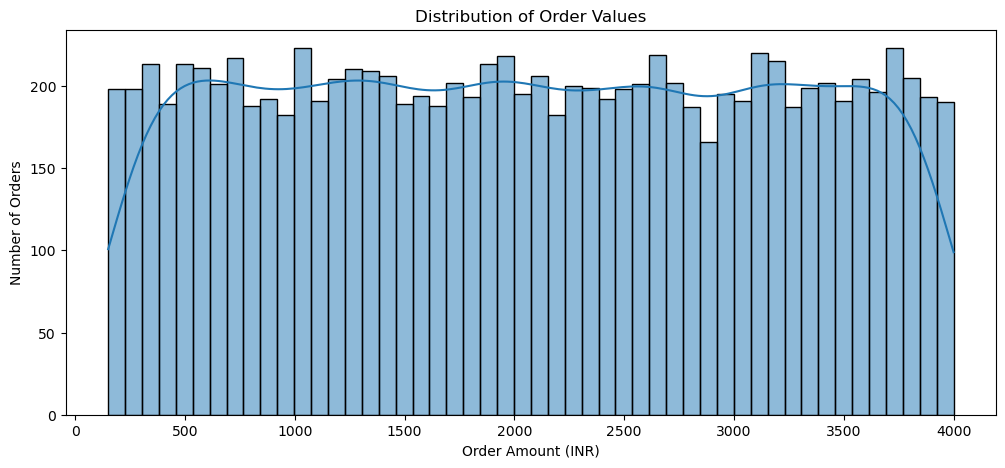

In [43]:
plt.figure(figsize=(12,5))
sns.histplot(orders["order_value"], kde=True, bins=50)
plt.title('Distribution of Order Values')
plt.xlabel('Order Amount (INR)')
plt.ylabel("Number of Orders")
plt.show()

### 2. Category-wise Revenue

C:\Users\FCI\AppData\Local\Temp\ipykernel_5192\440362632.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_revenue.index, y=category_revenue.values, palette= 'Reds_r')


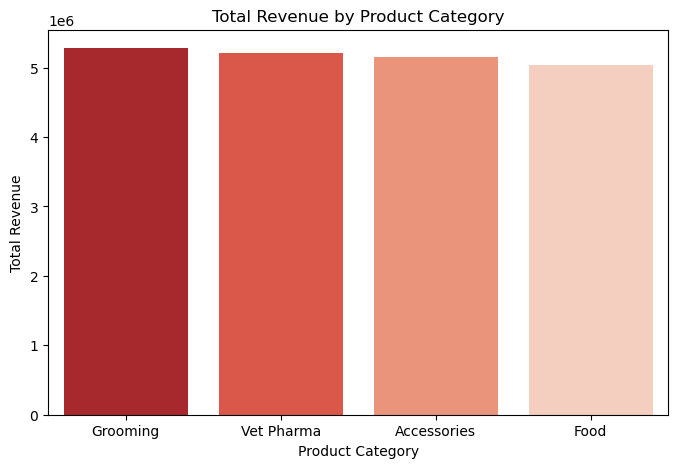

In [45]:
category_revenue = orders.groupby('product_category')['order_value'].sum().sort_values(ascending=False)

plt.figure(figsize=(8,5))
sns.barplot(x=category_revenue.index, y=category_revenue.values, palette= 'Reds_r')
plt.title('Total Revenue by Product Category')
plt.ylabel('Total Revenue')
plt.xlabel("Product Category")
plt.show()

### 3. City-level Performance (by Revenue and Volume)

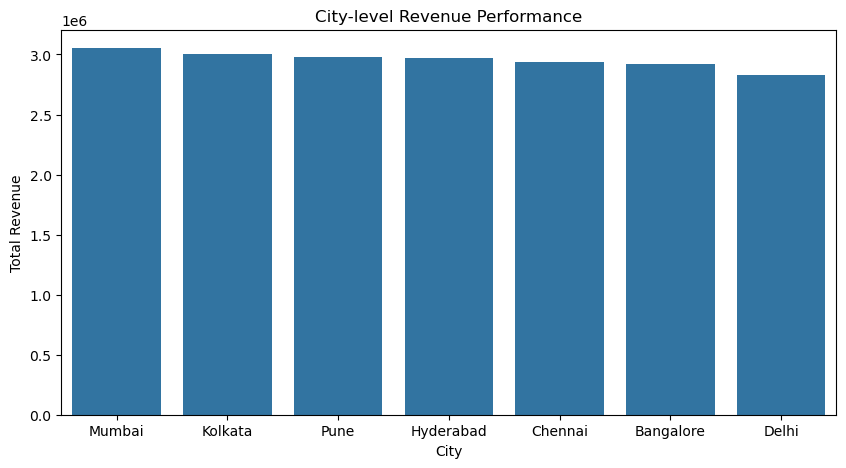

In [44]:
city_revenue = (orders.groupby("city")["order_value"].sum().sort_values(ascending=False))

plt.figure(figsize=(10, 5))
sns.barplot(x=city_revenue.index, y=city_revenue.values)
plt.xlabel("City")
plt.ylabel("Total Revenue")
plt.title("City-level Revenue Performance")
plt.show()

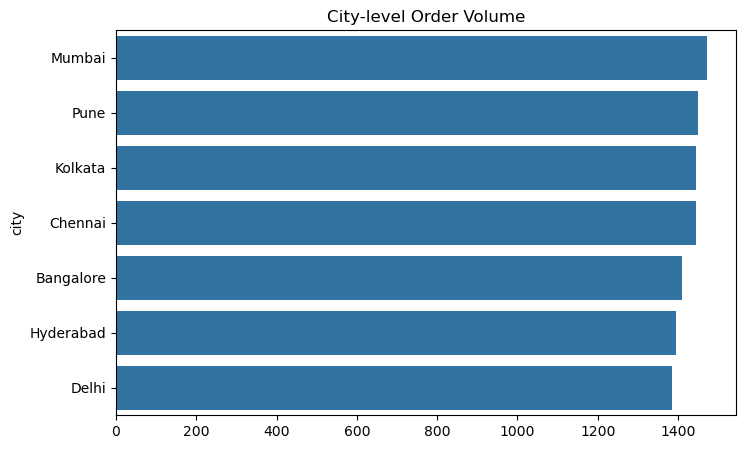

In [45]:
city_counts = orders['city'].value_counts()

plt.figure(figsize=(8,5))
sns.barplot(y=city_counts.index, x=city_counts.values)
plt.title('City-level Order Volume')
plt.show()

### 4. Payment Mode Breakdown

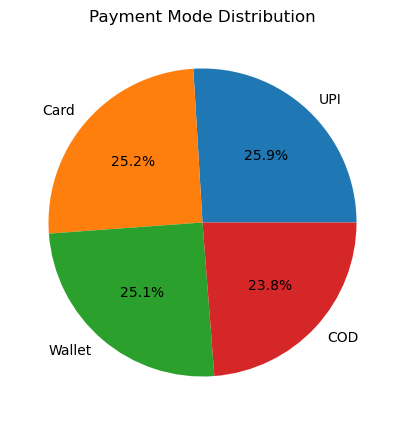

In [46]:
payment_counts = orders["payment_mode"].value_counts()

plt.figure(figsize=(8, 5))
plt.pie(payment_counts, labels=payment_counts.index, autopct='%1.1f%%')
plt.title('Payment Mode Distribution')
plt.show()

### 5. Delivery TAT Distribution (Promised vs Actual)

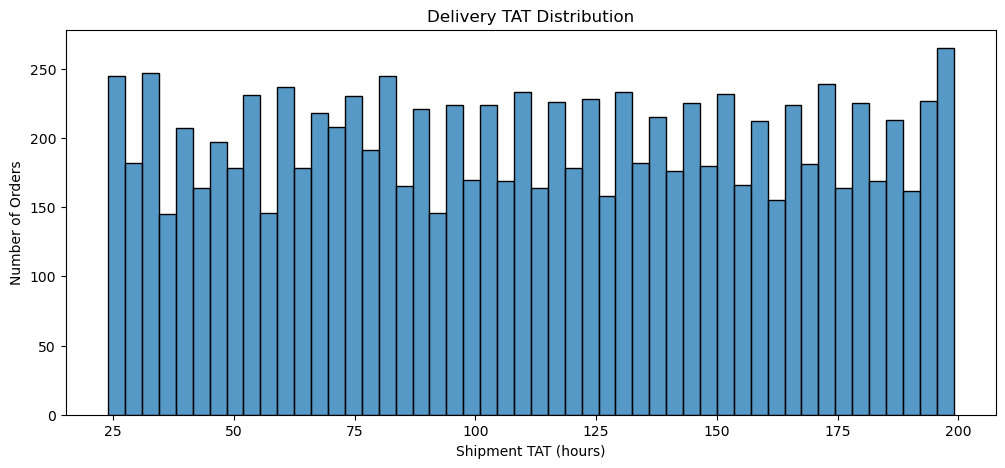

In [47]:
plt.figure(figsize=(12, 5))
sns.histplot(supply_chain["shipment_tat_hours"], bins=50)
plt.xlabel("Shipment TAT (hours)")
plt.ylabel("Number of Orders")
plt.title("Delivery TAT Distribution")
plt.show()

### 6. Communication Channel Read/Click Effectiveness

<Figure size 800x500 with 0 Axes>

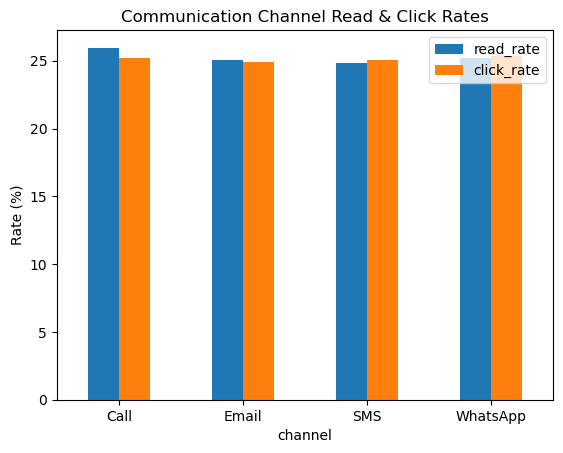

In [48]:
# Calculating Read Rate and Click Rate per channel
comm_stats = dataframes['communication_logs'].groupby('channel').agg(
    total=('delivery_status', 'count'),
    reads=('delivery_status', lambda x: (x == 'Read').sum()),
    clicks=('customer_action', lambda x: (x == 'Clicked').sum())
)
comm_stats['read_rate'] = comm_stats['reads'] / comm_stats['total']
comm_stats['click_rate'] = comm_stats['clicks'] / comm_stats['total']

comm_stats_pct = comm_stats.copy()
comm_stats_pct["read_rate"] *= 100
comm_stats_pct["click_rate"] *= 100

plt.figure(figsize=(8, 5))
comm_stats_pct[["read_rate", "click_rate"]].plot(kind="bar")
plt.ylabel("Rate (%)")
plt.title("Communication Channel Read & Click Rates")
plt.xticks(rotation=0)
plt.show()

### 7. Support Ticket Trend by Week

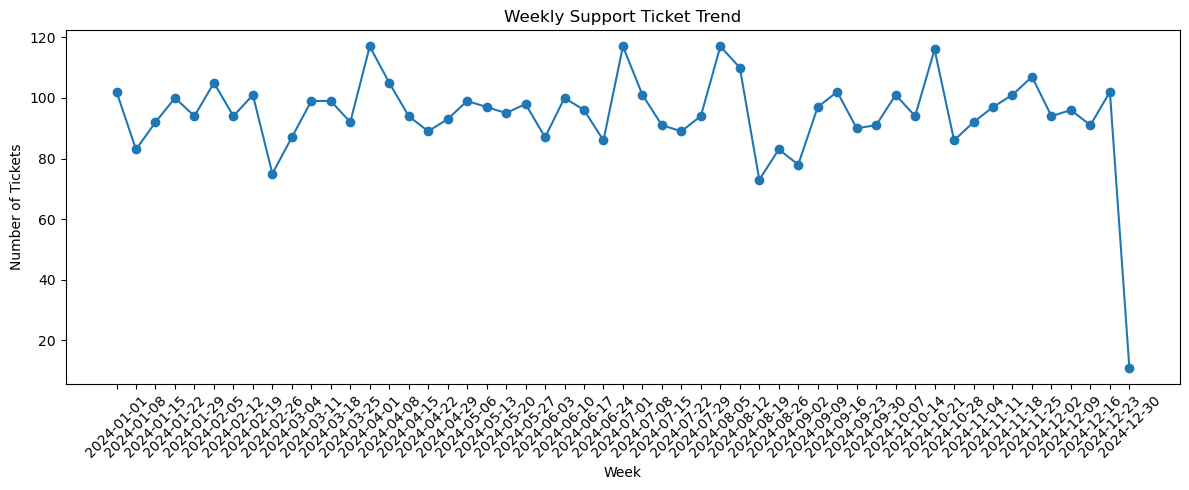

In [49]:
df["week_start"] = support_tickets["created_at"].dt.to_period("W").apply(lambda x: x.start_time)
weekly_tickets = df.groupby("week_start").size()

plt.figure(figsize=(12, 5))
plt.plot(weekly_tickets.index, weekly_tickets.values, marker='o')
plt.xlabel("Week")
plt.ylabel("Number of Tickets")
plt.title("Weekly Support Ticket Trend")
plt.xticks(
    weekly_tickets.index,
    weekly_tickets.index.strftime("%Y-%m-%d"),
    rotation=45
)
plt.tight_layout()
plt.show()

## B3. RFM & Customer Segmentation

### 1. Build Recency, Frequency, Monetary scores

In [50]:
# The most recent date in the dataset is the reference point

latest_date = orders["order_date"].max() + pd.Timedelta(days=1)
latest_date

Timestamp('2024-12-31 22:30:00')

In [51]:
# Aggregate data by customer

rfm = (orders.groupby("customer_id").agg(
        Recency=("order_date", lambda x: (latest_date - x.max()).days),
        Frequency=("order_id", "nunique"),
        Monetary=("order_value", "sum")
    )
    .reset_index()
)
rfm.head()

,customer_id,Recency,Frequency,Monetary
0,1001,22,3,9499.65
1,1002,67,2,5728.43
2,1004,178,2,3338.67
3,1005,318,1,2274.95
4,1006,161,1,1623.44


In [52]:
# Assign scores from 1 to 5 

rfm['R_Score'] = pd.qcut(rfm['Recency'], 5, labels=[5, 4, 3, 2, 1]).astype(int)
rfm['F_Score'] = pd.qcut(rfm['Frequency'].rank(method='first'), 5, labels=[1, 2, 3, 4, 5]).astype(int)
rfm['M_Score'] = pd.qcut(rfm['Monetary'], 5, labels=[1, 2, 3, 4, 5]).astype(int)

# Combined RFM Score
rfm['RFM_Score'] = rfm[['R_Score', 'F_Score', 'M_Score']].sum(axis=1).astype(int)

rfm

,customer_id,Recency,Frequency,Monetary,R_Score,F_Score,M_Score,RFM_Score
0,1001,22,3,9499.65,5,5,5,15
1,1002,67,2,5728.43,4,3,5,12
2,1004,178,2,3338.67,2,3,3,8
3,1005,318,1,2274.95,1,1,2,4
4,1006,161,1,1623.44,3,1,2,6
...,...,...,...,...,...,...,...,...
5997,9994,273,1,2506.65,1,3,2,6
5998,9995,101,2,7286.33,4,5,5,14
5999,9996,198,3,8731.35,2,5,5,12
6000,9997,162,1,1480.59,3,3,2,8


### 2. Segment customers into Gold / Silver / Bronze / At-Risk / New

In [53]:
Total_Customers = orders['customer_id'].nunique()
Total_Customers

6002

In [54]:
def segment_customer(row):
    # New customers (recent, first purchase)
    if row["Frequency"] == 1 and row["R_Score"] >= 4:
        return "New"
    # Best customers
    elif row["R_Score"] >= 4 and row["F_Score"] >= 4 and row["M_Score"] >= 4:
        return "Gold"
    # Loyal and growing customers
    elif row["R_Score"] >= 3 and row["F_Score"] >= 3:
        return "Silver"
    # Previously good, now inactive
    elif row["R_Score"] <= 2 and row["F_Score"] >= 3:
        return "At-Risk"
    # Low engagement / value
    else:
        return "Bronze"

rfm["Segment"] = rfm.apply(segment_customer, axis=1)
print(rfm['Segment'].value_counts())

Segment
Bronze     1739
Silver     1209
At-Risk    1100
Gold       1042
New         912
Name: count, dtype: int64


### 3. Visualizing Insights

#### Segment Distribution (Volume)

C:\Users\FCI\AppData\Local\Temp\ipykernel_11120\296352507.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=segment_counts.index, y=segment_counts.values, palette='magma')


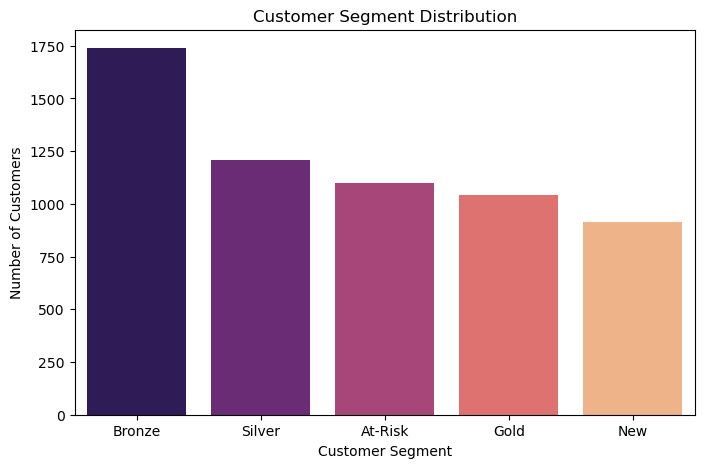

In [55]:
segment_counts = rfm['Segment'].value_counts()

plt.figure(figsize=(8, 5))
sns.barplot(x=segment_counts.index, y=segment_counts.values, palette='magma')
plt.title('Customer Segment Distribution')
plt.ylabel('Number of Customers')
plt.xlabel("Customer Segment")
plt.show()

#### Monetary Value by Segment

C:\Users\FCI\AppData\Local\Temp\ipykernel_11120\3331143621.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=segment_revenue.index, y=segment_revenue.values, palette='viridis')


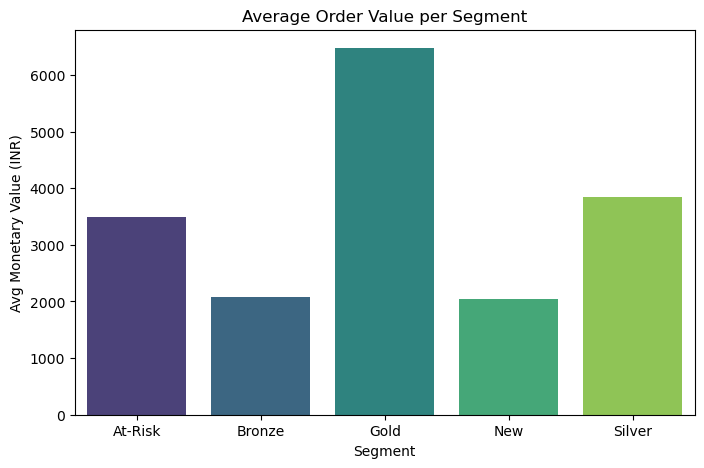

In [56]:
segment_revenue = rfm.groupby('Segment')['Monetary'].mean()

plt.figure(figsize=(8,5))
sns.barplot(x=segment_revenue.index, y=segment_revenue.values, palette='viridis')
plt.title('Average Order Value per Segment')
plt.ylabel('Avg Monetary Value (INR)')
plt.show()

#### Average Order Value by Segment

C:\Users\FCI\AppData\Local\Temp\ipykernel_11120\583147215.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=segment_aov.index, y=segment_aov.values, palette='viridis')


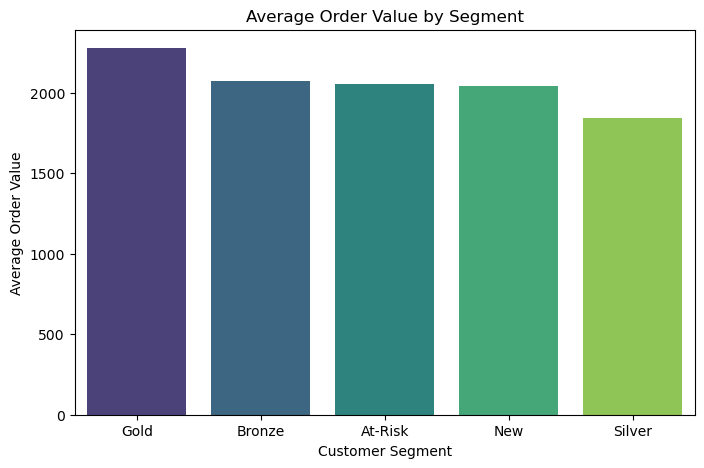

In [57]:
segment_aov = (
    orders.merge(
        rfm[["customer_id", "Segment"]],
        on="customer_id",
        how="left"
    ).groupby("Segment")["order_value"].mean().sort_values(ascending=False)
)

plt.figure(figsize=(8, 5))
sns.barplot(x=segment_aov.index, y=segment_aov.values, palette='viridis')
plt.xlabel("Customer Segment")
plt.ylabel("Average Order Value")
plt.title("Average Order Value by Segment")
plt.xticks(rotation=0)
plt.show()

## B5. Supply Chain Insights

### 1. Correlation analysis: weight vs TAT vs shipment_mode

To identify if heavier packages are causing delivery delays and how the shipment mode (Air vs. Surface) impacts speed.

In [58]:
supply_chain[["weight", "shipment_tat_hours"]].corr()

,weight,shipment_tat_hours
weight,1.000000,0.002667
shipment_tat_hours,0.002667,1.000000


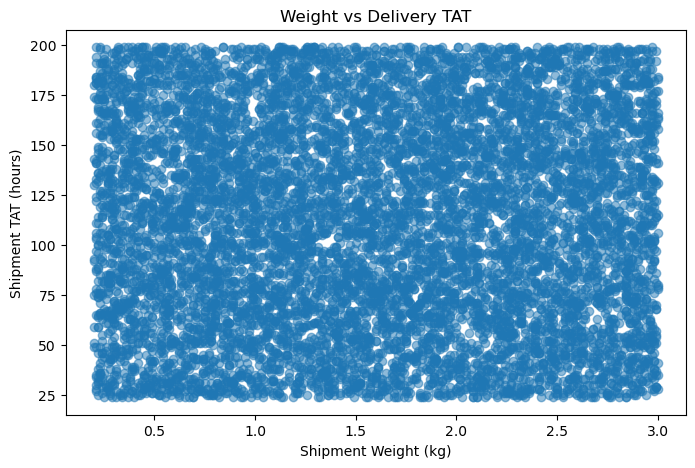

In [59]:
plt.figure(figsize=(8, 5))
plt.scatter(supply_chain["weight"],supply_chain["shipment_tat_hours"],alpha=0.5)
plt.xlabel("Shipment Weight (kg)")
plt.ylabel("Shipment TAT (hours)")
plt.title("Weight vs Delivery TAT")
plt.show()

The scatter plot appears congested due to a high volume of observations and near-zero correlation between shipment weight and delivery TAT.
This indicates that delivery delays are not driven by shipment weight, but rather by operational factors.

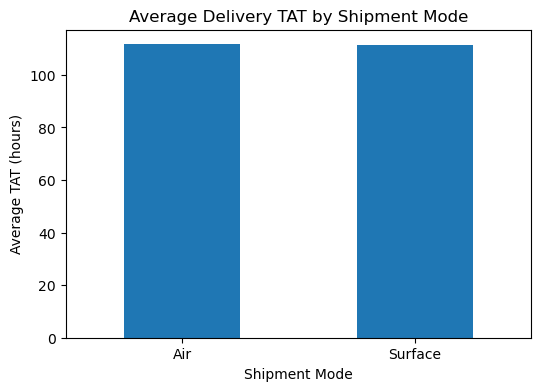

In [60]:
sc_orders = supply_chain.merge(orders[["order_id", "shipment_mode"]], on="order_id", how="left")
tat_by_mode = sc_orders.groupby("shipment_mode")["shipment_tat_hours"].mean()

plt.figure(figsize=(6, 4))
tat_by_mode.plot(kind="bar")
plt.xlabel("Shipment Mode")
plt.ylabel("Average TAT (hours)")
plt.title("Average Delivery TAT by Shipment Mode")
plt.xticks(rotation=0)
plt.show()

Average delivery TAT is nearly identical for Air and Surface shipments, indicating that shipment mode alone does not significantly influence delivery speed.

### 2. Top 10 SKUs with Highest RTO Probability

In [61]:
sku_rto = orders.merge(
    supply_chain[['order_id', 'rto_flag']],
    on='order_id',
    how='left'
)

sku_rto_stats = (
    sku_rto.groupby('product_id')
    .agg(
        total_orders=('order_id', 'count'),
        rto_orders=('rto_flag', 'sum')
    )
)

sku_rto_stats['rto_probability'] = (
    sku_rto_stats['rto_orders'] / sku_rto_stats['total_orders']
)

# Filter low-volume SKUs
top_rto_skus = (
    sku_rto_stats[sku_rto_stats['total_orders'] > 5]
    .sort_values('rto_probability', ascending=False)
    .head(10)
)

top_rto_skus

,total_orders,rto_orders,rto_probability
product_id,,,
SKU02054,6,3,0.500000
SKU00761,6,2,0.333333
SKU03853,6,2,0.333333
SKU01239,6,2,0.333333
SKU04521,6,2,0.333333
SKU03782,7,2,0.285714
SKU04310,7,2,0.285714
SKU02079,9,2,0.222222
SKU01738,6,1,0.166667


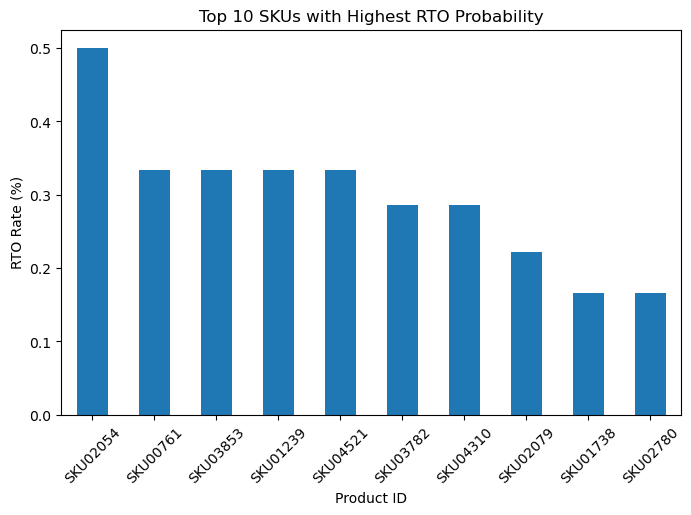

In [62]:
plt.figure(figsize=(8, 5))
top_rto_skus["rto_probability"].plot(kind="bar")
plt.xlabel("Product ID")
plt.ylabel("RTO Rate (%)")
plt.title("Top 10 SKUs with Highest RTO Probability")
plt.xticks(rotation=45)
plt.show()

### 3. Warehouse-Level Bottlenecks (Hub-In Scan Delays)

In [63]:
supply_chain["hub_delay_hours"] = (supply_chain["hub_in_scan"] - supply_chain["first_mile_scan"]).dt.total_seconds() / 3600

warehouse_delays = (supply_chain.groupby("warehouse")["hub_delay_hours"].mean().sort_values(ascending=False))

warehouse_delays

warehouse
DEL    18.293713
GGN    18.020183
BLR    17.943792
BOM    17.922999
HYD    17.794740
Name: hub_delay_hours, dtype: float64

C:\Users\FCI\AppData\Local\Temp\ipykernel_11120\2722516028.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=warehouse_delays.index, y=warehouse_delays.values, palette='Reds_r')


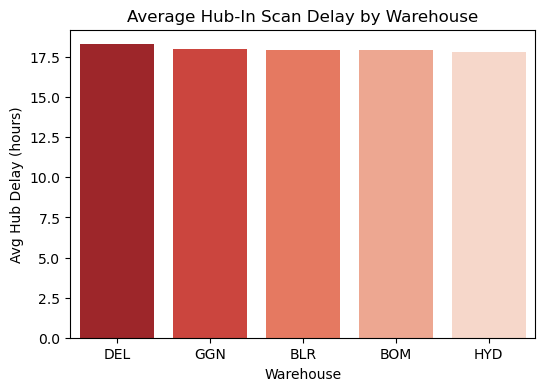

In [64]:
plt.figure(figsize=(6, 4))
sns.barplot(x=warehouse_delays.index, y=warehouse_delays.values, palette='Reds_r')
plt.xlabel("Warehouse")
plt.ylabel("Avg Hub Delay (hours)")
plt.title("Average Hub-In Scan Delay by Warehouse")
plt.xticks(rotation=0)
plt.show()

Average hub-in scan delays are consistent across all warehouses, with differences of less than one hour.
This suggests that no single warehouse is a dominant bottleneck and that delays are driven by network-level logistics processes.